https://github.com/qpv-research-group/solcore5/blob/develop/examples/advanced_examples/MJ_solar_cell_3J_efficiency_map.ipynb
    
https://github.com/qpv-research-group/solcore5/blob/develop/examples/advanced_examples/MJ_solar_cell_3J_efficiency_map.py

https://docs.solcore.solar/en/latest/Examples/example_MJ_efficiency_map.html (not exactly the same as above two)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from solcore.light_source import LightSource
from solcore.solar_cell import SolarCell
from solcore.solar_cell_solver import solar_cell_solver
from solcore.structure import Junction

In [3]:
wl = np.linspace(300, 4000, 4000) * 1e-9
light = LightSource(
    source_type="standard", version="AM1.5g", x=wl, output_units="photon_flux_per_m"
)
T = 298
V = np.linspace(0, 5, 500)

In [4]:
def solve_MJ(EgBot, EgMid, EgTop):
    db_junction0 = Junction(kind="DB", T=T, Eg=EgBot, A=1, R_shunt=np.inf, n=3.5)
    db_junction1 = Junction(kind="DB", T=T, Eg=EgMid, A=1, R_shunt=np.inf, n=3.5)
    db_junction2 = Junction(kind="DB", T=T, Eg=EgTop, A=1, R_shunt=np.inf, n=3.5)
    my_solar_cell = SolarCell(
        [db_junction2, db_junction1, db_junction0], T=T, R_series=0
    )
    solar_cell_solver(
        my_solar_cell,
        "iv",
        user_options={
            "T_ambient": T,
            "db_mode": "top_hat",
            "voltages": V,
            "light_iv": True,
            "internal_voltages": np.linspace(-6, 5, 1100),
            "wavelength": wl,
            "mpp": True,
            "light_source": light,
        },
    )
    return my_solar_cell

In [5]:
N1 = 10
N2 = 10
Eg0 = 1.12
all_Eg1 = np.linspace(1.3, 1.8, N1)
all_Eg2 = np.linspace(1.7, 2.4, N2)
eff = np.zeros((N1, N2))
N = N1 * N2
index = 0
Effmax = -1
Eg1_max = all_Eg1[0]
Eg2_max = all_Eg2[0]

In [6]:
for i, Eg1 in enumerate(all_Eg1):
    for j, Eg2 in enumerate(all_Eg2):
        my_solar_cell = solve_MJ(Eg0, Eg1, Eg2)
        mpp = my_solar_cell.iv.Pmpp
        eff[i, j] = mpp
        if mpp > Effmax:
            Effmax = mpp
            Eg1_max = Eg1
            Eg2_max = Eg2
        index += 1
        print(int(index / N * 100), "%\n")

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
1 %

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
2 %

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
3 %

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
4 %

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
5 %

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
6 %

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
7 %

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
8 %

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell.

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
74 %

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
75 %

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
76 %

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
77 %

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
78 %

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
79 %

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
80 %

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
81 %

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
82 %

Solving IV of 

In [7]:
optimum_MJ = solve_MJ(Eg0, Eg1_max, Eg2_max)

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...


Text(0, 0.5, 'Current (A/m$^2$)')

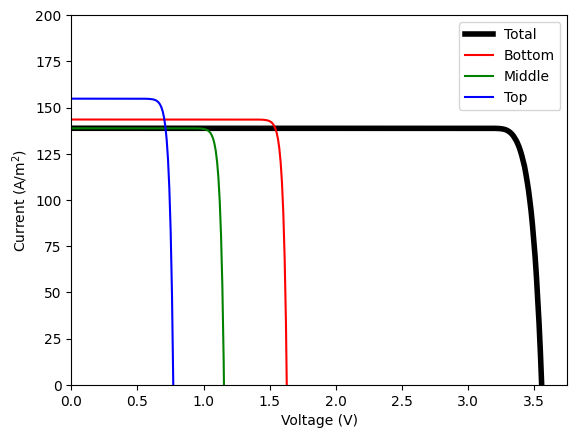

In [8]:
plt.figure(1)
plt.plot(V, optimum_MJ.iv.IV[1], "k", linewidth=4, label="Total")
plt.plot(V, -optimum_MJ[0].iv(V), "r", label="Bottom")
plt.plot(V, -optimum_MJ[1].iv(V), "g", label="Middle")
plt.plot(V, -optimum_MJ[2].iv(V), "b", label="Top")
plt.ylim(0, 200)
plt.xlim(0, 3.75)
plt.legend()
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A/m$^2$)")

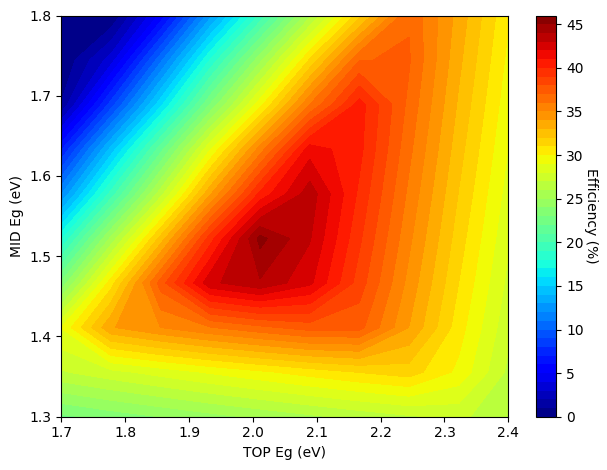

In [9]:
plt.figure(2)
eff = eff / light.power_density * 100
plt.contourf(all_Eg2, all_Eg1, eff, 50, cmap=cm.jet)
plt.xlabel("TOP Eg (eV)")
plt.ylabel("MID Eg (eV)")
cbar = plt.colorbar()
cbar.set_label("Efficiency (%)", rotation=270, labelpad=10)
plt.tight_layout()
plt.show()